## 探索新能源汽车的运行数据，发现其各种因素对其能耗的相关性

#### 本项目采用上海市新能源汽车公共数据采集与监测研究中心提供的新能源汽车运行数据

#### 数据集：纯电汽车运行：SHEVDC_OV6N7709.csv
#### 混动运行数据：SHEVDC_0C023H25.csv
#### 各字段描述：数据字段说明.xlsx

### 目录：
#### 一、数据处理
#### 二、数据探索
#### 三、###

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#### 导入数据

In [39]:
data_electric = pd.read_csv('./BEV/SHEVDC_OV6N7709.csv')#纯电汽车数据

In [40]:
data_electric.head()

,time,vehiclestatus,chargestatus,runmodel,speed,summileage,sumvoltage,sumcurrent,soc,dcdcstatus,...,max_cell_volt,min_volt_num,min_volt_cell_id,min_cell_volt,max_temp_num,max_temp_probe_id,max_temp,min_temp_num,min_temp_probe_id,min_temp
0,2019-01-10 01:12:00,1,4,1,0.0,39938.0,397.5,0.4,100,1,...,4.147,1,75,4.137,1,7,6,1,24,5
1,2019-01-10 01:12:10,1,4,1,0.0,39938.0,397.5,0.4,100,1,...,4.147,1,75,4.137,1,7,6,1,24,5
2,2019-01-10 01:12:20,1,4,1,0.0,39938.0,397.5,0.4,100,1,...,4.147,1,75,4.137,1,7,6,1,24,5
3,2019-01-10 01:12:30,1,4,1,0.0,39938.0,397.5,0.4,100,1,...,4.147,1,75,4.137,1,7,6,1,24,5
4,2019-01-10 01:12:40,1,4,1,0.0,39938.0,397.5,0.4,100,1,...,4.147,1,75,4.137,1,7,6,1,24,5


In [41]:
data_hybrid = pd.read_csv('./PHEV/SHEVDC_0C023H25.csv')
data_hybrid.head()

,time,vehiclestatus,chargestatus,runmodel,speed,summileage,sumvoltage,sumcurrent,soc,dcdcstatus,...,max_cell_volt,min_volt_num,min_volt_cell_id,min_cell_volt,max_temp_num,max_temp_probe_id,max_temp,min_temp_num,min_temp_probe_id,min_temp
0,2019-01-06 15:36:27,1,3,1,79.7,69788.0,361.2,10.4,73,1,...,3.769,1,96,3.761,1,3,25,1,6,23
1,2019-01-06 15:36:37,1,3,1,78.6,69789.0,360.0,13.1,72,1,...,3.753,1,96,3.743,1,3,25,1,6,23
2,2019-01-06 15:36:47,1,3,1,74.2,69789.0,361.2,9.5,72,1,...,3.765,1,96,3.757,1,3,25,1,6,23
3,2019-01-06 15:36:57,1,3,1,81.8,69789.0,350.5,63.9,72,1,...,3.663,1,96,3.645,1,3,25,1,6,23
4,2019-01-06 15:37:07,1,3,1,74.1,69789.0,361.2,3.4,71,1,...,3.789,1,96,3.782,1,3,25,1,6,23


### 数据查看

In [42]:
data_electric.info()#没有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231 entries, 0 to 6230
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  6231 non-null   object 
 1   vehiclestatus         6231 non-null   int64  
 2   chargestatus          6231 non-null   int64  
 3   runmodel              6231 non-null   int64  
 4   speed                 6231 non-null   float64
 5   summileage            6231 non-null   object 
 6   sumvoltage            6231 non-null   float64
 7   sumcurrent            6231 non-null   float64
 8   soc                   6231 non-null   int64  
 9   dcdcstatus            6231 non-null   int64  
 10  gearnum               6231 non-null   int64  
 11  insulationresistance  6231 non-null   int64  
 12  max_volt_num          6231 non-null   int64  
 13  max_volt_cell_id      6231 non-null   int64  
 14  max_cell_volt         6231 non-null   float64
 15  min_volt_num         

In [43]:
data_hybrid.info()#混动数据有空值，但只是发动机状态

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       3121 non-null   object 
 1   vehiclestatus              3121 non-null   int64  
 2   chargestatus               3121 non-null   int64  
 3   runmodel                   3121 non-null   int64  
 4   speed                      3121 non-null   float64
 5   summileage                 3121 non-null   float64
 6   sumvoltage                 3121 non-null   float64
 7   sumcurrent                 3121 non-null   float64
 8   soc                        3121 non-null   int64  
 9   dcdcstatus                 3121 non-null   int64  
 10  gearnum                    3121 non-null   int64  
 11  insulationresistance       3121 non-null   int64  
 12  enginestatus               1689 non-null   float64
 13  grankshaftspeed            1689 non-null   float

### 统计性描述

In [44]:
data_electric.describe()

,vehiclestatus,chargestatus,runmodel,speed,sumvoltage,sumcurrent,soc,dcdcstatus,gearnum,insulationresistance,...,max_cell_volt,min_volt_num,min_volt_cell_id,min_cell_volt,max_temp_num,max_temp_probe_id,max_temp,min_temp_num,min_temp_probe_id,min_temp
count,6231.000000,6231.000000,6231.0,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,...,6231.00000,6231.0,6231.000000,6231.000000,6231.0,6231.000000,6231.000000,6231.0,6231.000000,6231.000000
mean,1.700690,1.563633,1.0,10.126705,363.703418,0.943861,58.357407,1.686888,4.420960,5184.093404,...,3.79234,1.0,70.811266,3.782679,1.0,19.564275,10.004815,1.0,21.043332,8.783983
std,0.457993,0.889976,0.0,21.666992,17.014157,26.379983,26.393123,0.463797,6.556641,78.745283,...,0.17684,0.0,15.432097,0.176314,0.0,3.622739,1.322351,0.0,6.613793,1.089954
min,1.000000,1.000000,1.0,0.000000,322.200000,-113.100000,7.000000,1.000000,0.000000,4437.000000,...,3.38200,1.0,6.000000,3.346000,1.0,7.000000,6.000000,1.0,2.000000,5.000000
25%,1.000000,1.000000,1.0,0.000000,348.500000,-9.200000,35.000000,1.000000,0.000000,5177.000000,...,3.63200,1.0,75.000000,3.627000,1.0,17.000000,10.000000,1.0,24.000000,9.000000
50%,2.000000,1.000000,1.0,0.000000,363.000000,-8.800000,64.000000,2.000000,0.000000,5192.000000,...,3.78600,1.0,75.000000,3.773000,1.0,19.000000,10.000000,1.0,24.000000,9.000000
75%,2.000000,3.000000,1.0,0.000000,377.700000,0.800000,80.000000,2.000000,14.000000,5205.000000,...,3.93800,1.0,75.000000,3.929000,1.0,23.000000,11.000000,1.0,24.000000,9.000000
max,2.000000,4.000000,1.0,100.700000,397.500000,240.300000,100.000000,2.000000,15.000000,6872.000000,...,4.14700,1.0,96.000000,4.137000,1.0,24.000000,13.000000,1.0,24.000000,11.000000


#### 可以看出，纯电车最大速度100.7km/h
#### 电池最高温度13度，最低5度
#### SOC均值在58.35,标准差26.39
#### 电池单体电压3.38v-4.14v

In [45]:
data_hybrid.describe()

,vehiclestatus,chargestatus,runmodel,speed,summileage,sumvoltage,sumcurrent,soc,dcdcstatus,gearnum,...,max_cell_volt,min_volt_num,min_volt_cell_id,min_cell_volt,max_temp_num,max_temp_probe_id,max_temp,min_temp_num,min_temp_probe_id,min_temp
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,...,3121.000000,3121.0,3121.000000,3121.000000,3121.0,3121.000000,3121.000000,3121.0,3121.000000,3121.000000
mean,1.458827,1.947453,1.736302,13.635854,69853.980455,361.539250,-0.641974,57.543095,1.458827,7.719321,...,3.767752,1.0,61.212752,3.760058,1.0,3.423903,27.523871,1.0,6.462352,25.536367
std,0.498382,0.928775,0.454316,23.723204,42.582988,15.284665,17.985884,26.051087,0.498382,7.084430,...,0.158410,0.0,26.075302,0.159284,0.0,14.340370,1.563247,0.0,14.126442,1.505558
min,1.000000,1.000000,1.000000,0.000000,69788.000000,330.000000,-108.000000,18.000000,1.000000,0.000000,...,3.450000,1.0,6.000000,3.417000,1.0,2.000000,24.000000,1.0,5.000000,22.000000
25%,1.000000,1.000000,1.000000,0.000000,69822.000000,348.200000,-8.300000,32.000000,1.000000,0.000000,...,3.630000,1.0,39.000000,3.621000,1.0,2.000000,27.000000,1.0,5.000000,25.000000
50%,1.000000,2.000000,2.000000,0.000000,69833.000000,359.500000,-5.700000,60.000000,1.000000,14.000000,...,3.744000,1.0,68.000000,3.740000,1.0,2.000000,28.000000,1.0,5.000000,26.000000
75%,2.000000,3.000000,2.000000,22.600000,69909.000000,374.700000,1.600000,81.000000,2.000000,14.000000,...,3.903000,1.0,71.000000,3.898000,1.0,2.000000,28.000000,1.0,7.000000,26.000000
max,2.000000,3.000000,3.000000,103.600000,69909.000000,390.200000,105.100000,100.000000,2.000000,15.000000,...,4.065000,1.0,255.000000,4.056000,1.0,255.000000,33.000000,1.0,255.000000,31.000000


#### 混动的车电池温度在33度，最低22度，比纯电车高出一截
#### 混动车最大速度在103.6km/h
#### SOC均值在57.54，标准差为26.05
#### 电池单体电压范围3.45v-4.065v

### 数据处理

1、数据的采集时间

In [46]:
data_electric_min_time = data_electric['time'].min()
data_electric_max_time = data_electric['time'].max()
print(data_electric_min_time,data_electric_max_time)


2019-01-10 01:12:00 2019-01-11 12:16:18


In [47]:
data_hybrid_min_time = data_hybrid['time'].min()
data_hybrid_max_time = data_hybrid['time'].max()
print(data_hybrid_min_time,data_hybrid_max_time)

2019-01-06 15:36:27 2019-01-07 00:31:28


电车数据采集时间为期35小时左右，混动只有9小时左右，观察数据采集时间可知采集频率为10s一次，对于纯电车建议按小时取值，混动车按15分钟一次取值

In [48]:
def hour(time):
    return time[5:13]
data_electric['time'] = data_electric['time'].apply(hour)

electric_group = data_electric.groupby('time').mean()
electric_group.head()

,vehiclestatus,chargestatus,runmodel,speed,sumvoltage,sumcurrent,soc,dcdcstatus,gearnum,insulationresistance,...,max_cell_volt,min_volt_num,min_volt_cell_id,min_cell_volt,max_temp_num,max_temp_probe_id,max_temp,min_temp_num,min_temp_probe_id,min_temp
time,,,,,,,,,,,,,,,,,,,,,
01-10 01,1.000000,3.093190,1.0,14.955914,392.696416,12.277419,97.379928,1.00000,14.301075,5166.917563,...,4.097606,1.0,61.620072,4.083305,1.0,18.673835,6.000000,1.0,23.261649,5.103943
01-10 02,1.000000,2.864865,1.0,42.981081,371.701351,27.295495,78.216216,1.00000,14.067568,5175.364865,...,3.878932,1.0,59.450450,3.864725,1.0,19.554054,8.027027,1.0,22.225225,7.274775
01-10 03,1.000000,2.808989,1.0,43.995787,352.339607,29.968258,55.339888,1.00000,14.095506,5150.707865,...,3.677239,1.0,58.817416,3.663022,1.0,19.561798,9.949438,1.0,19.668539,8.814607
01-10 04,1.000000,2.816667,1.0,46.776944,340.896667,35.086111,29.002778,1.00000,14.005556,5155.027778,...,3.558089,1.0,55.441667,3.544222,1.0,19.438889,10.772222,1.0,19.538889,9.355556
01-10 05,1.707246,1.539130,1.0,10.651014,337.776522,2.398261,9.944928,1.66087,4.794203,5171.759420,...,3.525594,1.0,71.373913,3.511803,1.0,18.646377,12.452174,1.0,20.939130,10.608696


In [49]:
def quarter(time):
    m = int(time[14:16])//15+1
    return time[5:13]+' '+str(m)

data_hybrid['time'] = data_hybrid['time'].apply(quarter)
hybrid_group = data_hybrid.groupby('time').mean()

hybrid_group.head()

,vehiclestatus,chargestatus,runmodel,speed,summileage,sumvoltage,sumcurrent,soc,dcdcstatus,gearnum,...,max_cell_volt,min_volt_num,min_volt_cell_id,min_cell_volt,max_temp_num,max_temp_probe_id,max_temp,min_temp_num,min_temp_probe_id,min_temp
time,,,,,,,,,,,,,,,,,,,,,
01-06 15 3,1.0,2.711538,1.269231,35.171154,69791.730769,361.069231,7.448077,69.769231,1.0,14.000000,...,3.765519,1.0,72.461538,3.757135,1.0,5.538462,25.000000,1.0,7.269231,23.634615
01-06 15 4,1.0,2.844444,1.755556,9.181111,69795.433333,360.187778,2.195556,66.111111,1.0,14.511111,...,3.753611,1.0,78.033333,3.747700,1.0,4.555556,25.055556,1.0,6.688889,23.322222
01-06 16 1,1.0,3.000000,2.000000,0.000000,69796.000000,359.935165,0.803297,64.560440,1.0,15.000000,...,3.749692,1.0,79.967033,3.745231,1.0,2.703297,24.813187,1.0,6.318681,23.000000
01-06 16 2,1.0,2.858696,1.793478,6.386957,69796.108696,359.080435,1.629348,63.402174,1.0,14.597826,...,3.739848,1.0,75.565217,3.735196,1.0,3.608696,24.000000,1.0,5.391304,22.141304
01-06 16 3,1.0,2.766667,1.533333,25.726667,69799.922222,353.848889,10.896667,58.222222,1.0,14.000000,...,3.688000,1.0,67.688889,3.680811,1.0,2.933333,24.355556,1.0,5.911111,22.555556


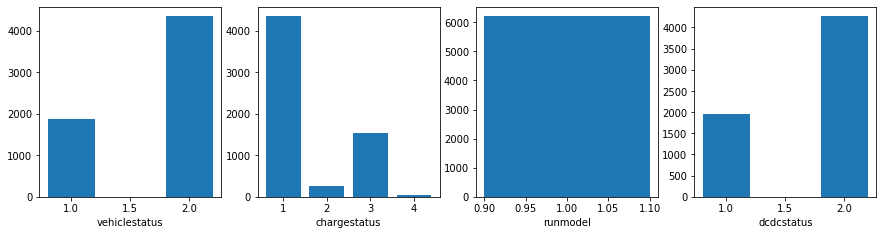

In [50]:
#电动汽车数据分布
import matplotlib.pyplot as plt

def distribution1(column):
    x = data1[column].value_counts().index
    y = data1[column].value_counts().values
    plt.bar(x,y,width=data1[column].nunique()*0.2)
    plt.xlabel(column)

plt.figure(figsize=(15,3.5))
data1 = data_electric[['vehiclestatus','chargestatus','runmodel','dcdcstatus']]

for i in range(0,4):
    plt.subplot(1,4,i+1)
    distribution1(data1.columns[i])

plt.show()

#### 车纯电辆大部门时间处于熄火状态
#### 充电状态四，完成充电较少，大部分处于1和3
#### dcdstatus处于状态2最多

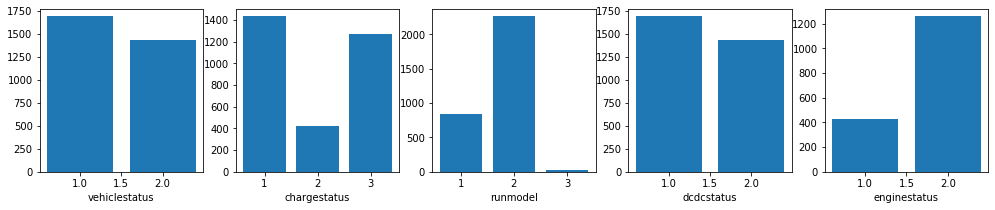

In [51]:
def distribution2(column):
    x = data2[column].value_counts().index
    y = data2[column].value_counts().values
    plt.bar(x,y)
    plt.xlabel(column)

plt.figure(figsize=(17,3))
data2 = data_hybrid[['vehiclestatus','chargestatus','runmodel','dcdcstatus','enginestatus']]

for i in range(0,5):
    plt.subplot(1,5,i+1)
    distribution2(data2.columns[i])

plt.show()

#### 混动车，明显大部分与纯电不同，处于启动状态
#### 混动车，行驶模式大部分都是混动模式，极少采用燃油模式
#### 混动车引擎多数时间处于2状态，关闭

### 分析电池状态

In [53]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

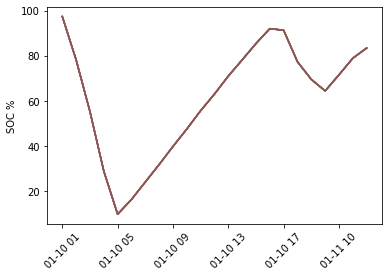

In [65]:
electric_xticks = []
for i in range(6):
    electric_xticks.append(electric_group.index[4*i])
    plt.plot(electric_group.index,electric_group.soc)
plt.xticks(electric_xticks,rotation=45)
plt.ylabel('SOC %')
plt.show()

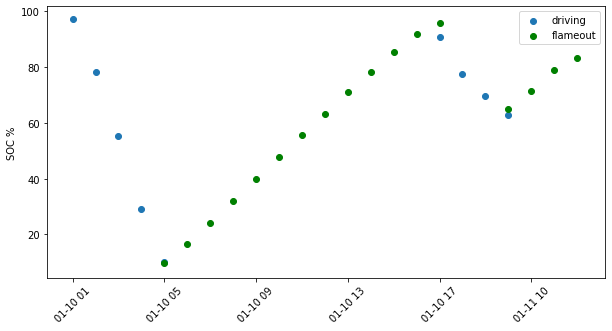

In [66]:
#plt.rcParams['font.sans-serif']=['STHeiti'] 

electric_group1 = data_electric[data_electric.vehiclestatus==1].groupby('time').mean()
electric_group2 = data_electric[data_electric.vehiclestatus==2].groupby('time').mean()

electric_group1 = pd.merge(pd.DataFrame(data_electric.time.unique(),columns=['time']),electric_group1,
                            how='left',left_on='time',right_on=electric_group1.index)
electric_group1.fillna(0)
electric_group2 = pd.merge(pd.DataFrame(data_electric.time.unique(),columns=['time']),electric_group2,
                            how='left',left_on='time',right_on=electric_group2.index)
electric_group2.fillna(0)

fig,ax1=plt.subplots(figsize=(10,5))
ax1.scatter(electric_group1.time,electric_group1.soc,label='driving')
plt.xticks(electric_xticks,rotation=45)
plt.ylabel('SOC %')
ax1.scatter(electric_group2.time,electric_group2.soc,color='g',label='flameout')
plt.legend()

plt.show()

该纯电车其充电时间在12h左右，而一直开车放电大约4小时
纯电车的soc超过半数时间都在50%以上

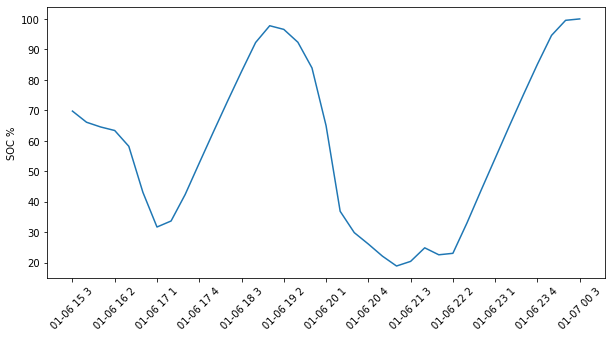

In [67]:
plt.figure(figsize=(10,5))

hybrid_xticks = []
for i in range(13):
    hybrid_xticks.append(hybrid_group.index[3*i])

plt.plot(hybrid_group.index,hybrid_group.soc)
plt.xticks(hybrid_xticks,rotation=45)
plt.ylabel('SOC %')

plt.show()

混动车的soc充电预防点大概都在两个多小时，SOC有时会波动上升，可能处于行驶充电状态

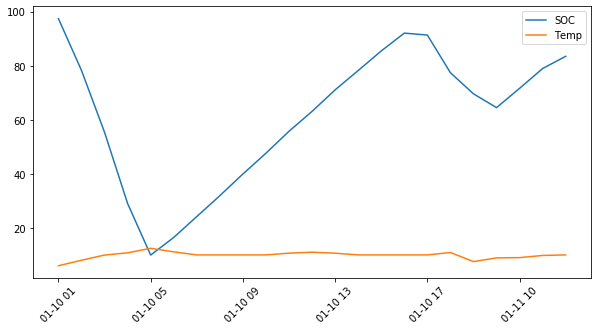

In [68]:
plt.figure(figsize=(10,5))

plt.plot(electric_group.index,electric_group.soc,label='SOC')
plt.plot(electric_group.index,electric_group.max_temp,label='Temp')
plt.xticks(electric_xticks,rotation=45)
plt.legend()

plt.show()

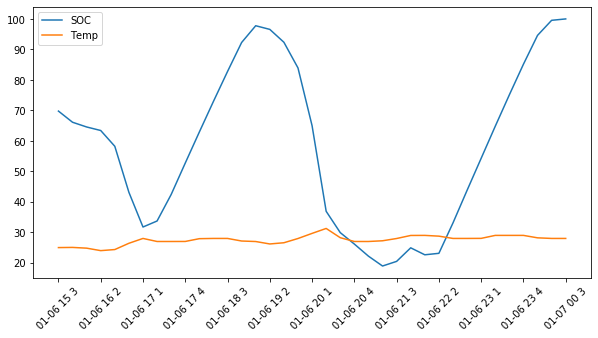

In [69]:
plt.figure(figsize=(10,5))

plt.plot(hybrid_group.index,hybrid_group.soc,label='SOC')
plt.plot(hybrid_group.index,hybrid_group.max_temp,label='Temp')
plt.xticks(hybrid_xticks,rotation=45)
plt.legend()

plt.show()

功率变化，总功率P=UI

In [70]:
electric_group['power'] = electric_group['sumvoltage']*electric_group['sumcurrent']

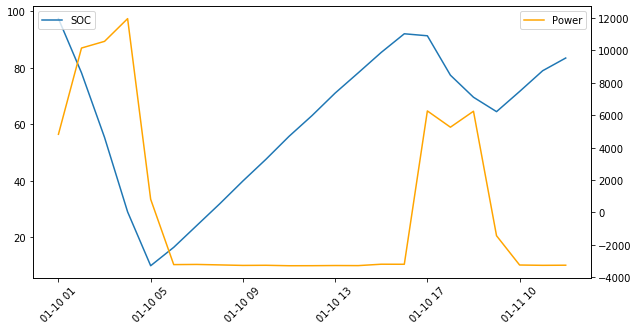

In [71]:
fig,ax1=plt.subplots(figsize=(10,5))
ax1.plot(electric_group.index,electric_group.soc,label='SOC')
plt.xticks(electric_xticks,rotation=45)
plt.legend(loc=2)
ax2=ax1.twinx()
ax2.plot(electric_group.index,electric_group.power,color='orange',label='Power')
plt.xticks(electric_xticks,rotation=45)
plt.legend()

plt.show()

对于纯电车，在充电期间，功率几乎不变，放电时，瞬时功率会变大

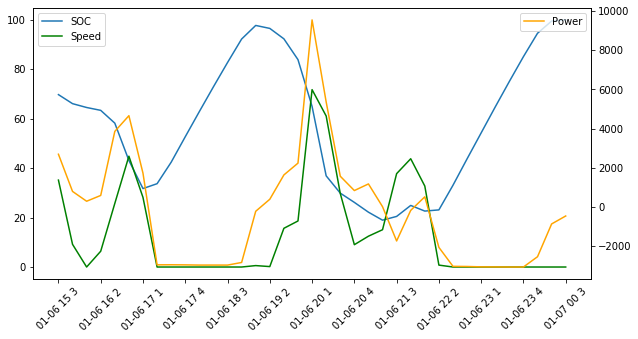

In [72]:
#对于混动车
hybrid_group['power'] = hybrid_group['sumvoltage']*hybrid_group['sumcurrent']

fig,ax1=plt.subplots(figsize=(10,5))
ax1.plot(hybrid_group.index,hybrid_group.soc,label='SOC')
ax1.plot(hybrid_group.index,hybrid_group.speed,color='g',label='Speed')
plt.xticks(hybrid_xticks,rotation=45)
plt.legend(loc=2)
ax2=ax1.twinx()
ax2.plot(hybrid_group.index,hybrid_group.power,color='orange',label='Power')
plt.xticks(hybrid_xticks,rotation=45)
plt.legend()

plt.show()

### 各个影响因素间的相关性

In [117]:
data_electric['summileage']=data_electric['summileage'].astype(float,errors='raise')
data_electric['summileage']=data_electric['summileage'].fillna(method='ffill',axis=0)
data_electric['distance']=data_electric['summileage']-min(data_electric['summileage'])
#### 由于summileage是object，将其转换为float并向下填充空值


data_electric['power'] = data_electric['sumvoltage']*data_electric['sumcurrent']
data_electric1 = data_electric[(data_electric['vehiclestatus']==1)&(data_electric['chargestatus']!=1)]
electric_corr=data_electric1[['distance','speed','power','gearnum','max_temp','soc']].corr()


In [118]:
import seaborn as sns


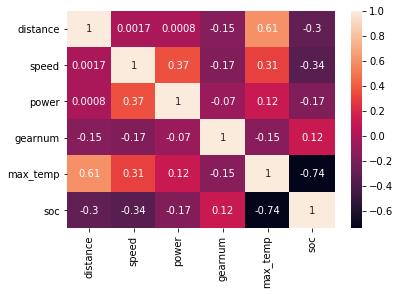

In [119]:
heatmap = sns.heatmap(electric_corr,annot=True)

#### 回归模型调用

In [120]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data_electric1.soc
X = data_electric1[['max_temp','speed','power']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

# 实例化一个LinearRegression类并调用
clf = LinearRegression()
clf.fit(train_X,train_y)
test_y_pred = clf.predict(test_X)

clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
a = clf.coef_
b = clf.intercept_

print('回归系数：',a,'，截距：',b)

回归系数： [-9.84143897e+00 -8.38057768e-02 -7.83937601e-05] ，截距： 159.1945714940778


In [122]:
from sklearn.metrics import r2_score
r2_score(test_y,test_y_pred)

0.5385325703761892

#### 准确率0.52

更改变量，继续试验

也许在一个完整的放电时间内去回归效果更好

In [123]:
#电动汽车一次完整的放电过程数据
data_electric2 = data_electric[(data_electric['time']>='01-10 01')&(data_electric['time']<='01-10 05')]
data_electric2[['distance','speed','power','gearnum','max_temp','soc']].corr()

,distance,speed,power,gearnum,max_temp,soc
distance,1.000000,0.009690,-0.048358,-0.535278,0.972000,-0.999305
speed,0.009690,1.000000,0.449681,0.413613,0.057449,-0.011174
power,-0.048358,0.449681,1.000000,0.290716,-0.025285,0.046937
gearnum,-0.535278,0.413613,0.290716,1.000000,-0.474814,0.529325
max_temp,0.972000,0.057449,-0.025285,-0.474814,1.000000,-0.970405
soc,-0.999305,-0.011174,0.046937,0.529325,-0.970405,1.000000


#### 可以看出soc与distance相关程度高,max_temp和gearnum其次

In [124]:
y = data_electric2.soc
X = data_electric2[['distince','max_temp','gearnum']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

# 实例化一个LinearRegression类并调用
clf = LinearRegression()
clf.fit(train_X,train_y)
test_y_pred = clf.predict(test_X)

clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
a = clf.coef_
b = clf.intercept_

print('回归系数：',a,'，截距：',b)

回归系数： [-0.60216772  0.31646558 -0.05606774] ，截距： 98.2700734006709


In [126]:
r2_score(test_y,test_y_pred)

0.9986870113765047

soc=-0.6021*distance + 0.3164*max_temp + -0.056*gearnum + 98.27

In [127]:
#### 继续探索混动车soc的影响因素

In [128]:
data_hybrid['power'] = data_hybrid['sumvoltage']*data_hybrid['sumcurrent']
data_hybrid['distance'] = data_hybrid['summileage']-min(data_hybrid['summileage'])
data_hybrid1 = data_hybrid[data_hybrid['enginestatus']==1]
data_hybrid1[['chargestatus','distance','speed','power','gearnum','max_temp',
                'grankshaftspeed','soc']].corr()

,chargestatus,distance,speed,power,gearnum,max_temp,grankshaftspeed,soc
chargestatus,1.000000,-0.118385,0.004872,0.687276,-0.058846,-0.071826,0.043988,0.164638
distance,-0.118385,1.000000,0.373480,-0.066912,0.035244,0.672353,0.072657,-0.818908
speed,0.004872,0.373480,1.000000,0.001805,0.084560,0.604542,0.579285,-0.375031
power,0.687276,-0.066912,0.001805,1.000000,-0.008415,-0.065653,-0.050287,0.099259
gearnum,-0.058846,0.035244,0.084560,-0.008415,1.000000,-0.007834,-0.023145,-0.105821
max_temp,-0.071826,0.672353,0.604542,-0.065653,-0.007834,1.000000,0.313536,-0.429131
grankshaftspeed,0.043988,0.072657,0.579285,-0.050287,-0.023145,0.313536,1.000000,-0.075443
soc,0.164638,-0.818908,-0.375031,0.099259,-0.105821,-0.429131,-0.075443,1.000000


In [129]:
#### 距离，温度和速度

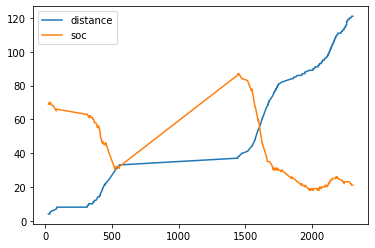

In [131]:
data_hybrid1[['distance','soc']].plot()

In [137]:
data_electric.info()
data_electric.to_csv('./BEV/clean_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231 entries, 0 to 6230
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  6231 non-null   object 
 1   vehiclestatus         6231 non-null   int64  
 2   chargestatus          6231 non-null   int64  
 3   runmodel              6231 non-null   int64  
 4   speed                 6231 non-null   float64
 5   summileage            6231 non-null   float64
 6   sumvoltage            6231 non-null   float64
 7   sumcurrent            6231 non-null   float64
 8   soc                   6231 non-null   int64  
 9   dcdcstatus            6231 non-null   int64  
 10  gearnum               6231 non-null   int64  
 11  insulationresistance  6231 non-null   int64  
 12  max_volt_num          6231 non-null   int64  
 13  max_volt_cell_id      6231 non-null   int64  
 14  max_cell_volt         6231 non-null   float64
 15  min_volt_num         

In [139]:
data_hybrid.to_csv('./PHEV/clean_data_hybrid.csv')